# Compute Drawdowns
After processing data... 
1. Compute a wealth index  
2. Compute a previous peaks  
3. Compute drawdown - which is the wealth index value as a percentage of the previous peak.  

In [1]:
import pandas as pd

<AxesSubplot:>

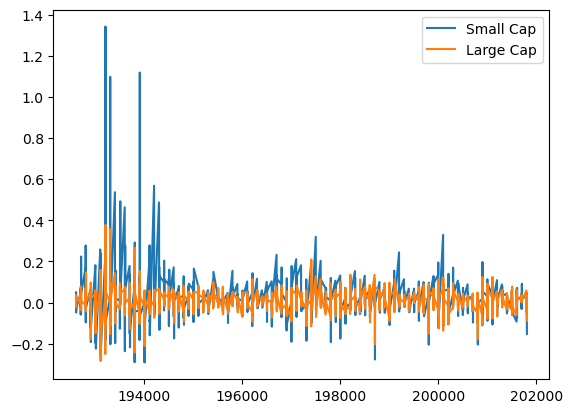

In [2]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header= 0, index_col= 0, parse_dates= True, na_values= -99.99)
rets= me_m[['Lo 10', 'Hi 10']]
rets.columns= ['Small Cap','Large Cap']
rets= rets/100
rets.plot.line()

In [3]:
rets.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [4]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [5]:
rets.index= pd.to_datetime(rets.index, format='%Y%m')
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [6]:
rets.index= rets.index.to_period('M')
rets.head()

,Small Cap,Large Cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [7]:
rets['1975']

C:\Users\arthu\AppData\Local\Temp\ipykernel_6868\1888962728.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets['1975']


,Small Cap,Large Cap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [8]:
wealth_index = 1000*(1+rets['Large Cap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: Large Cap, dtype: float64

<AxesSubplot:>

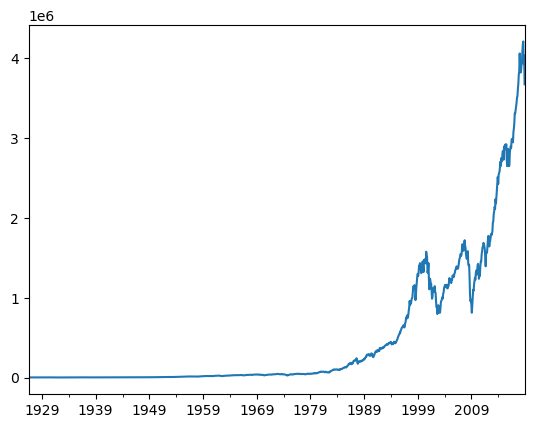

In [9]:
wealth_index.plot()

In [10]:
#df.cummax() - Return cumulative maximum over a DataFrame or Series axis.
previous_peaks= wealth_index.cummax() 

<AxesSubplot:>

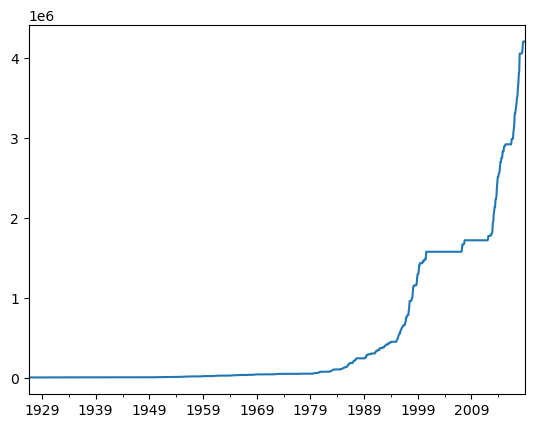

In [11]:
previous_peaks.plot()

<AxesSubplot:>

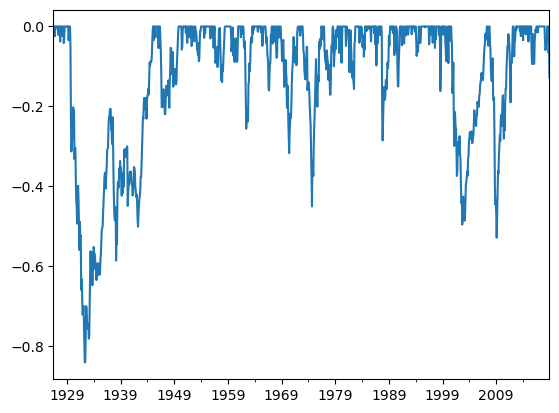

In [12]:
drawdown = (wealth_index- previous_peaks)/previous_peaks
drawdown.plot()

In [13]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: Large Cap, dtype: float64

In [14]:
#To find the max drawdown we need to find the min value.
drawdown.min()

-0.8400375277943123

In [15]:
#The max drawdown since 1970
drawdown['1970':].min()

-0.5280945042309304

In [16]:
#When exactly did that happen? You need to check index.
#df.idxmin() - Return index of first occurrence of minimum over requested axis.
drawdown['1970':].idxmin()

Period('2009-02', 'M')

In [17]:
drawdown.idxmin()

Period('1932-05', 'M')

In [18]:
#Let's do the same thing by defining a function 
#def(x: pd.Series) - It's hinting to Python that x is expecting a Pandas Series.
# Triple quotes= docstrings(Documentation Strings)
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a Dataframe that contains:
    the wealth index
    the prevoius peak
    percent drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns= (wealth_index- previous_peaks)/ previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })


In [19]:
#Lets try Large cap at first
drawdown(rets['Large Cap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [20]:
#We can simply put what we want into drawdown func
drawdown(rets['Large Cap'])[['Wealth','Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

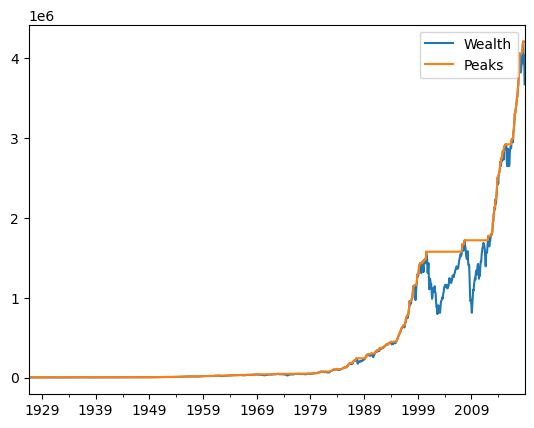

In [21]:
#Plot them together
drawdown(rets['Large Cap'])[['Wealth','Peaks']].plot()

<AxesSubplot:>

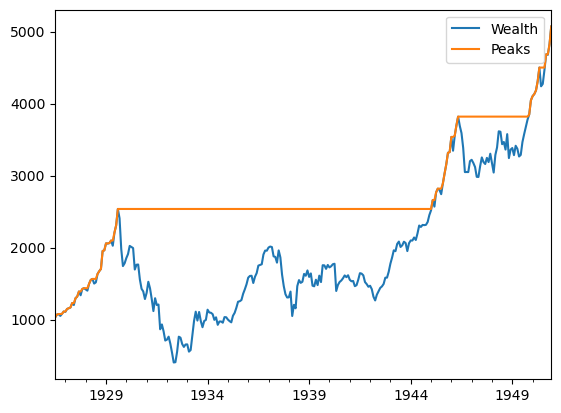

In [22]:
drawdown(rets[:'1950']['Large Cap'])[['Wealth','Peaks']].plot()

In [23]:
drawdown(rets['Large Cap'])['Drawdown'].min()

-0.8400375277943123

In [24]:
#Let's take a look for small cap
drawdown(rets['Small Cap'])['Drawdown'].min()

-0.8330007793945303

In [25]:
drawdown(rets['Small Cap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [26]:
drawdown(rets['Large Cap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [27]:
drawdown(rets['1940':]['Small Cap'])['Drawdown'].min()

-0.7000596091967917

In [28]:
drawdown(rets['1940':]['Small Cap'])['Drawdown'].idxmin()

Period('1974-12', 'M')

The beauty of writing our own function is shown above.
We don't have to retype in all that stuff because I want to go from SmallCap to LargeCap.